In [73]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [74]:
digits = load_digits()

In [75]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [76]:
digits.data[0]  ## data version of image[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

C:\Users\sayem\AppData\Local\Temp\ipykernel_17004\1099779192.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(digits.images[i])


<Figure size 640x480 with 0 Axes>

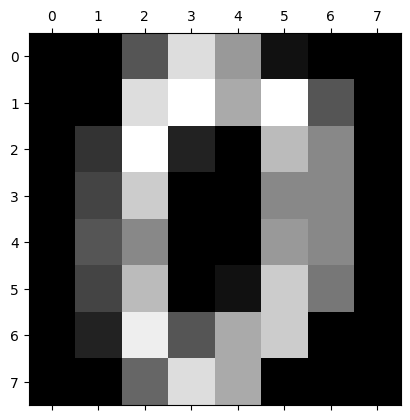

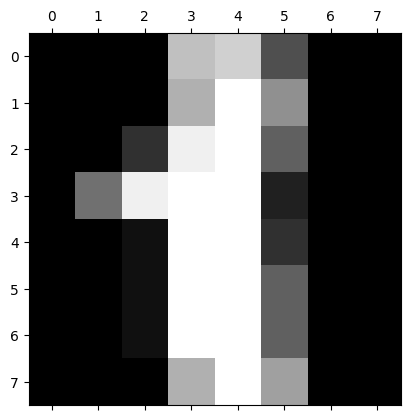

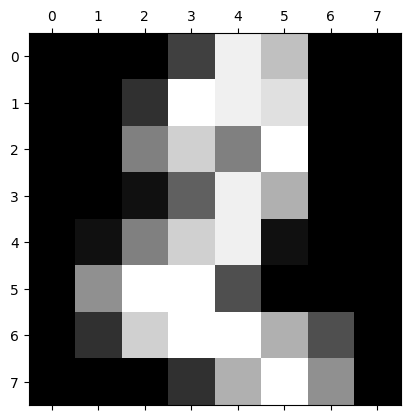

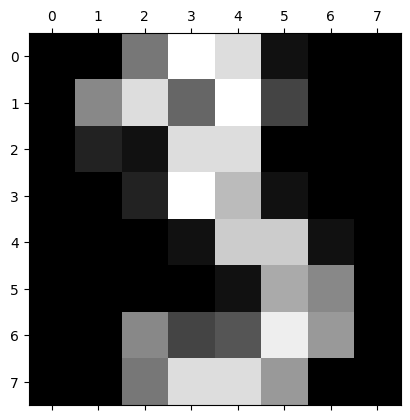

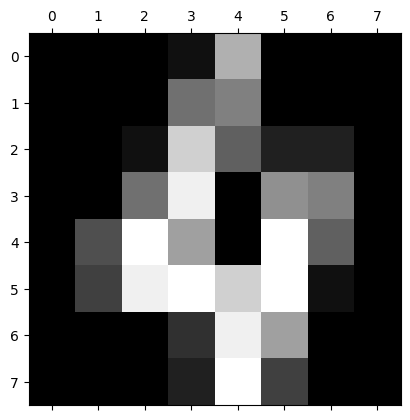

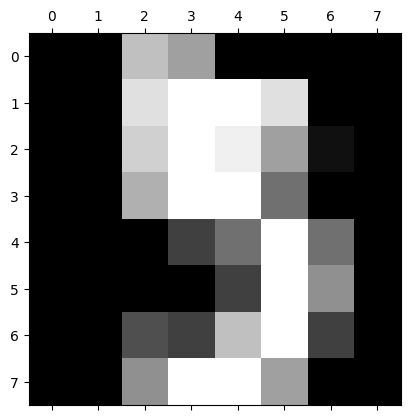

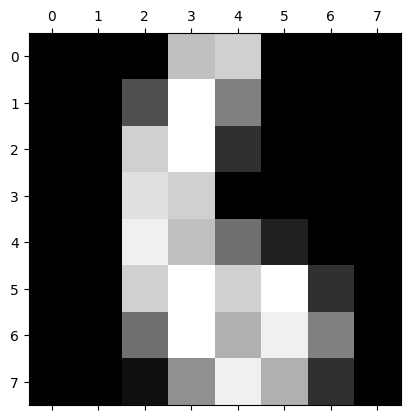

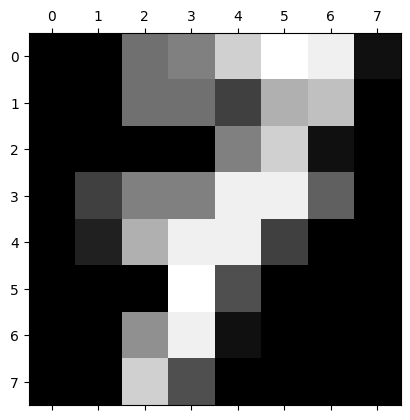

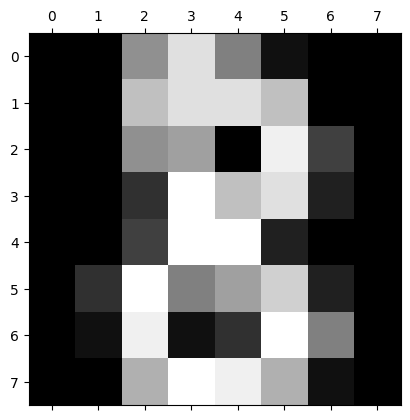

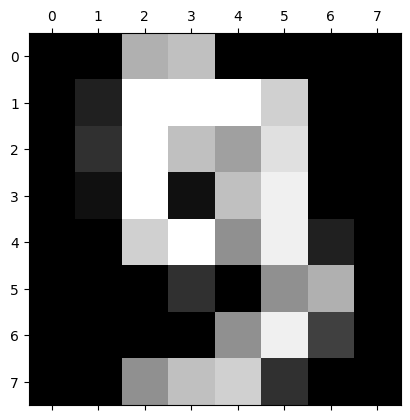

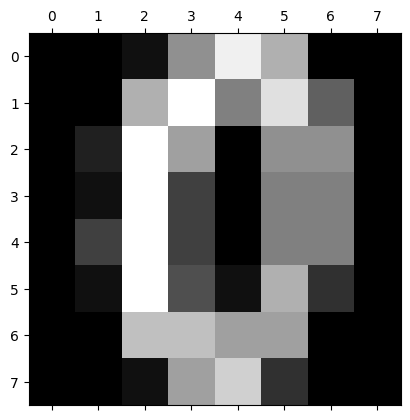

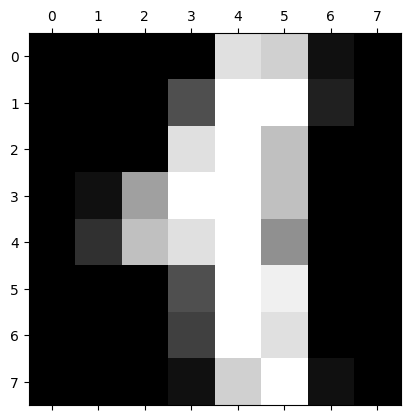

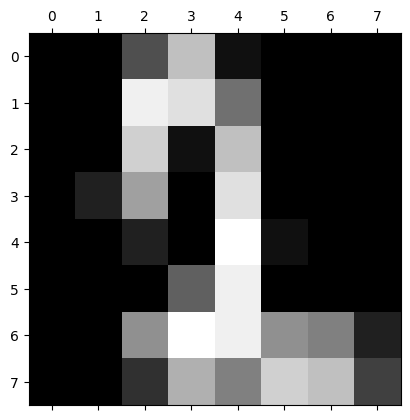

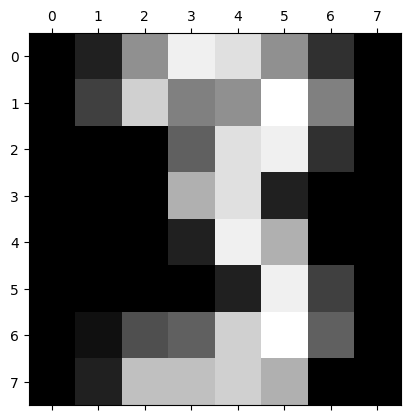

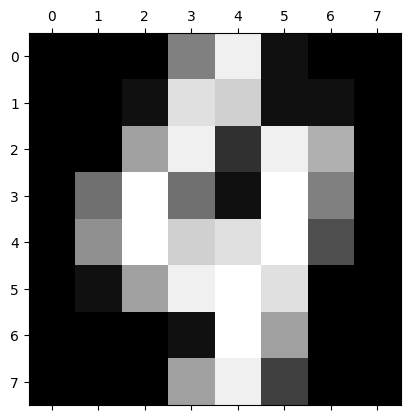

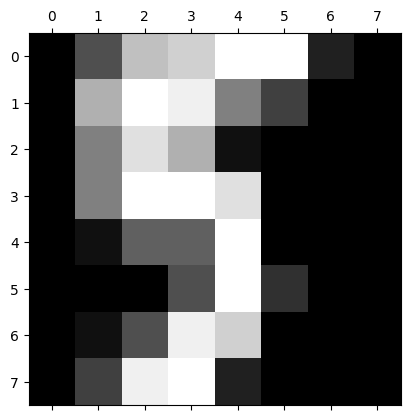

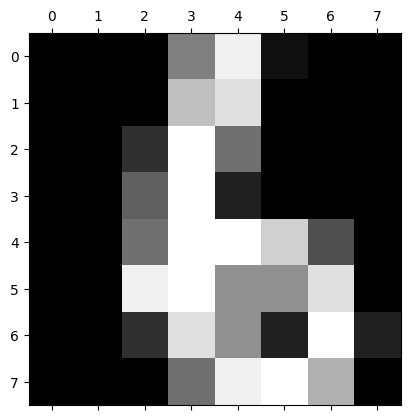

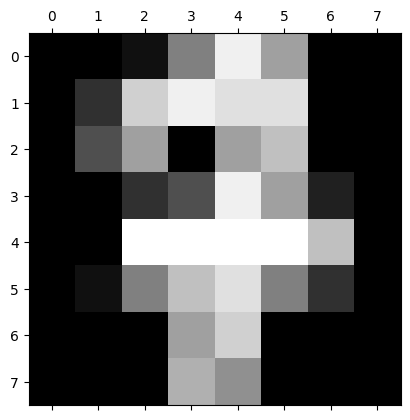

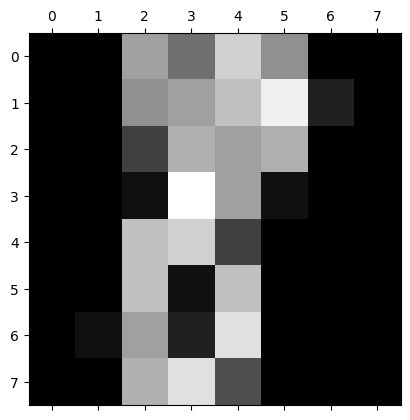

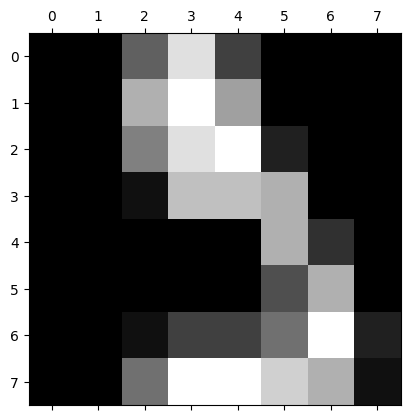

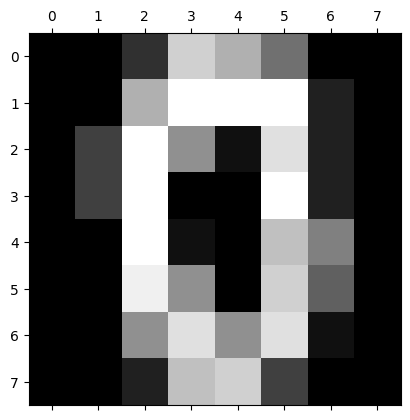

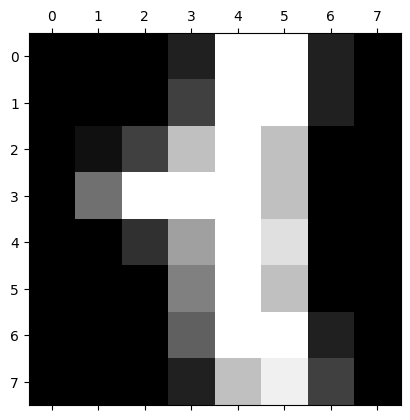

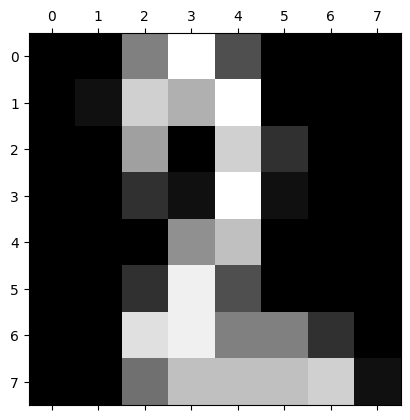

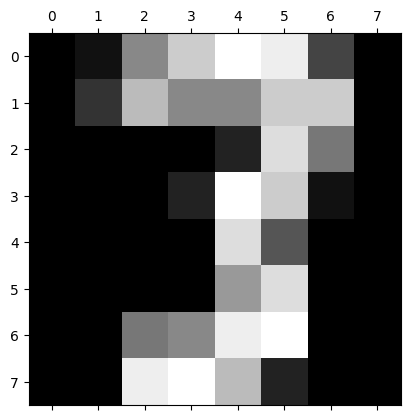

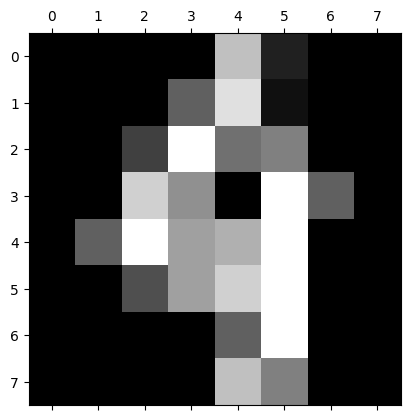

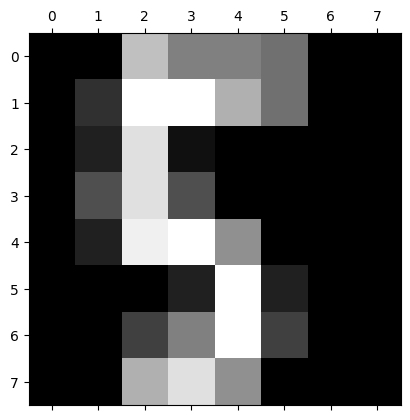

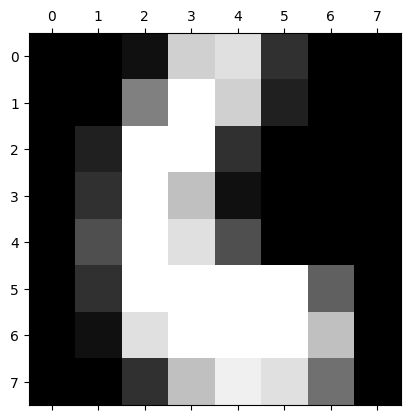

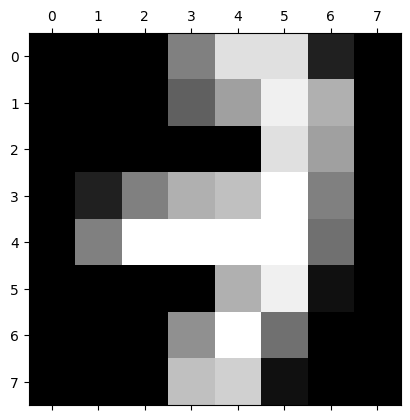

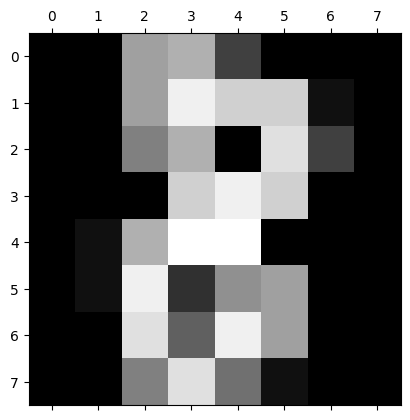

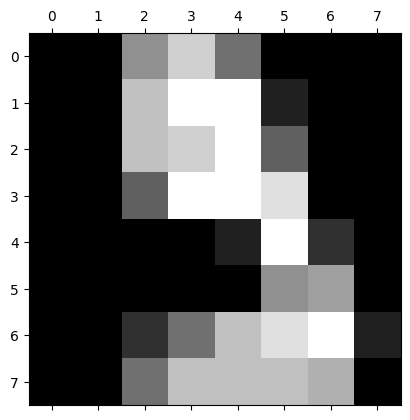

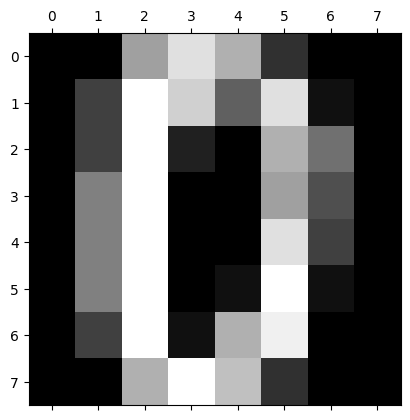

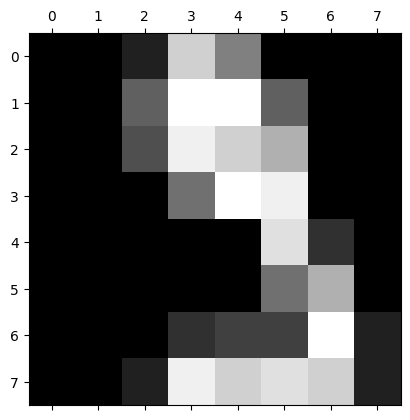

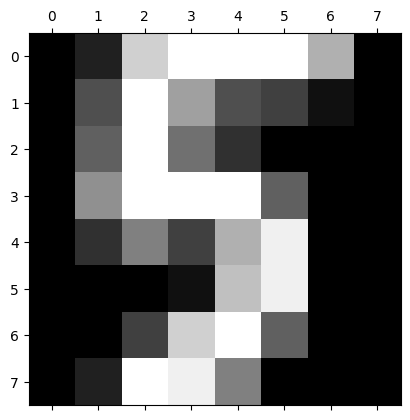

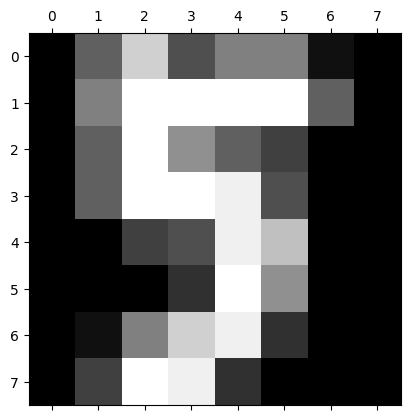

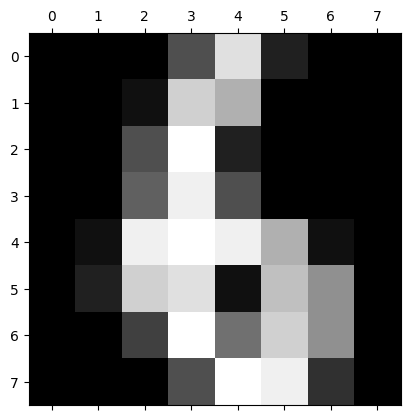

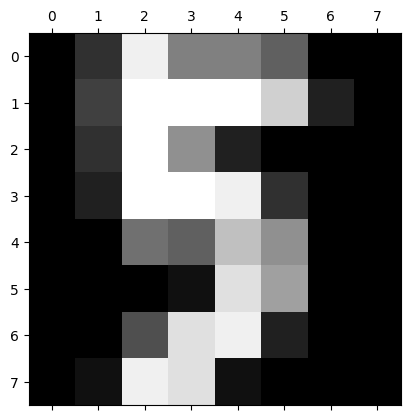

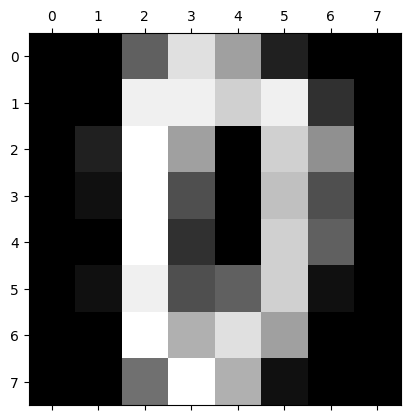

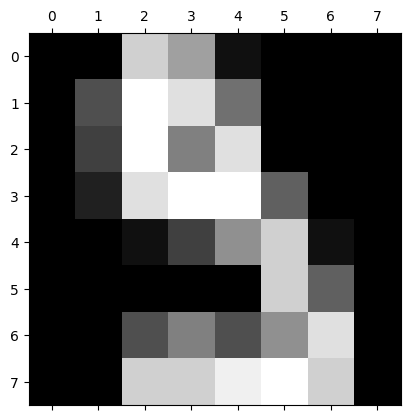

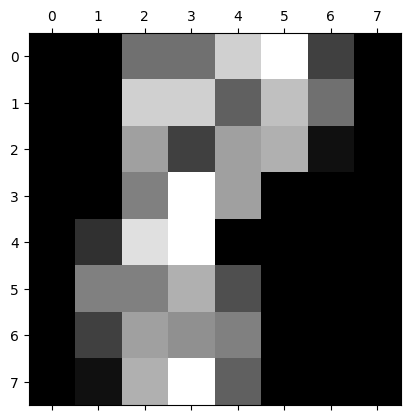

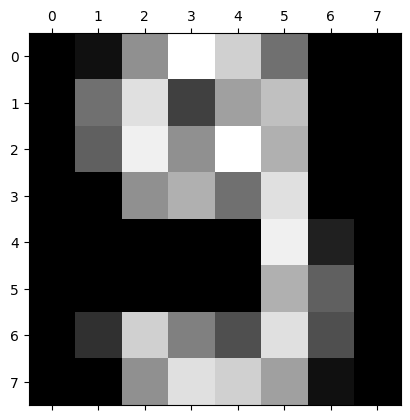

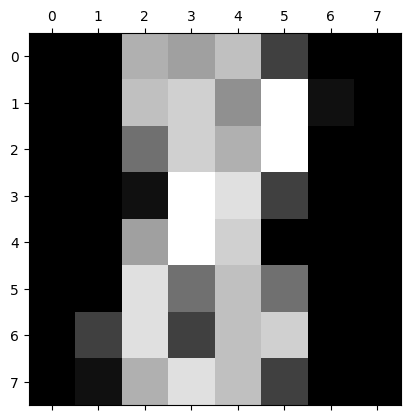

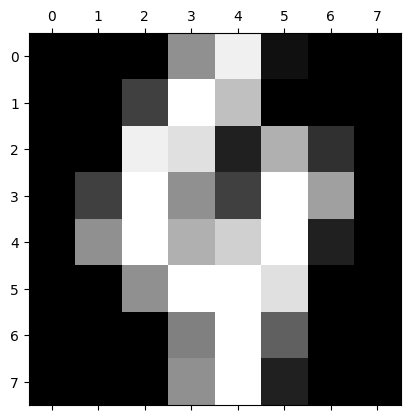

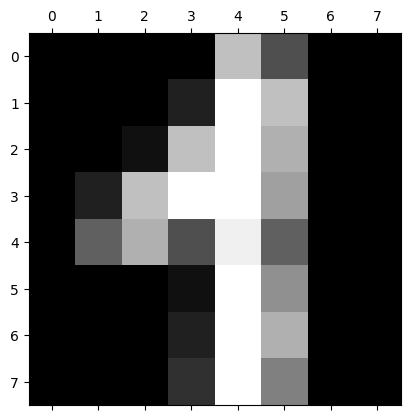

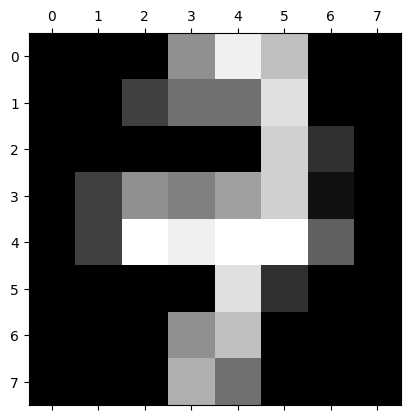

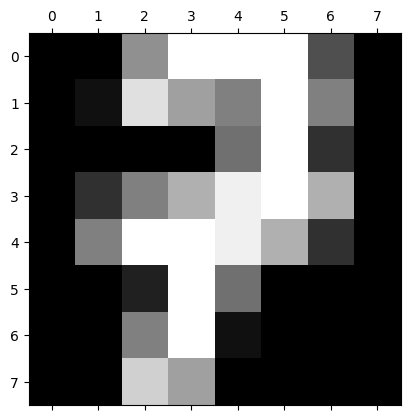

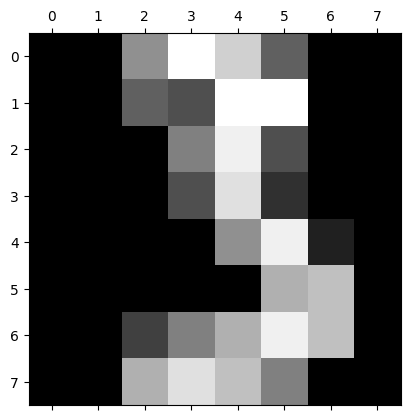

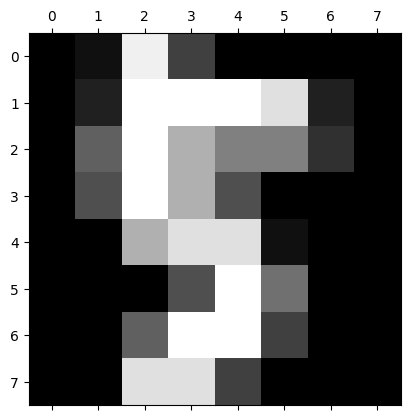

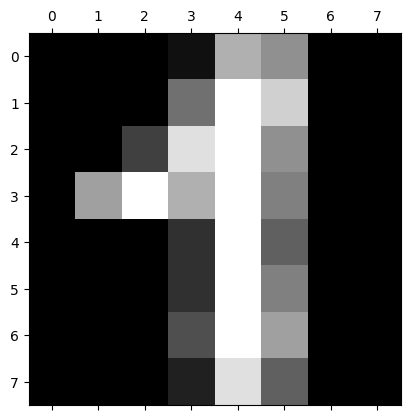

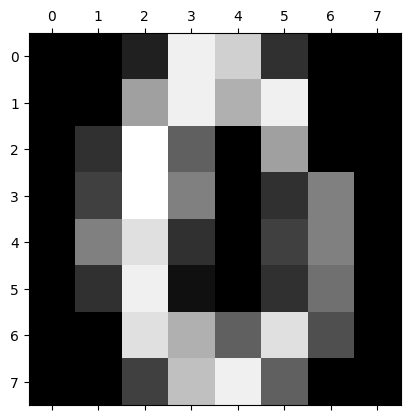

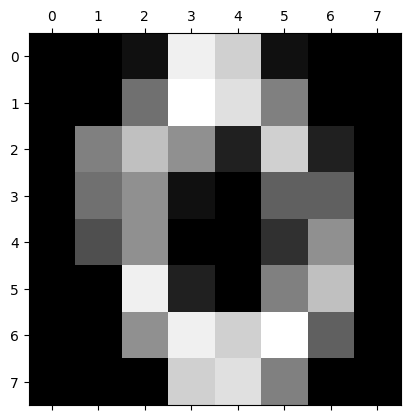

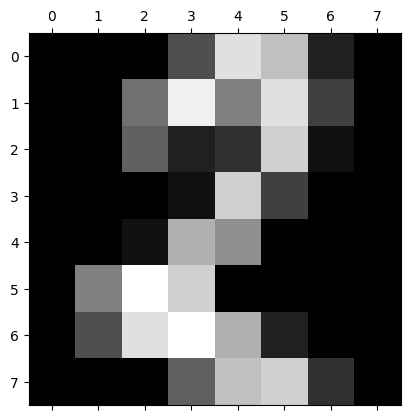

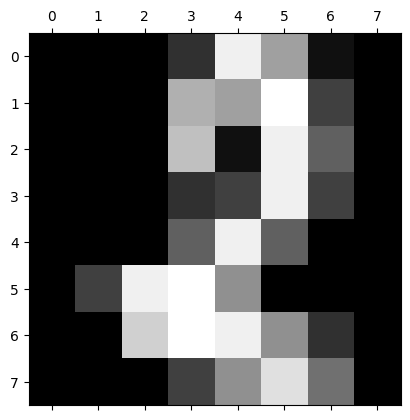

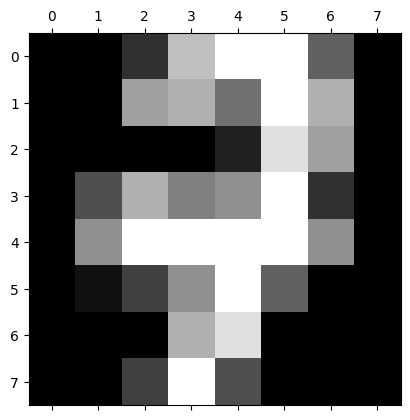

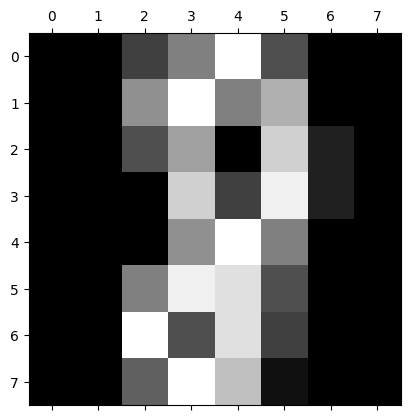

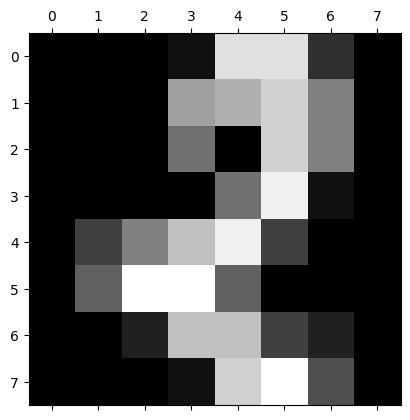

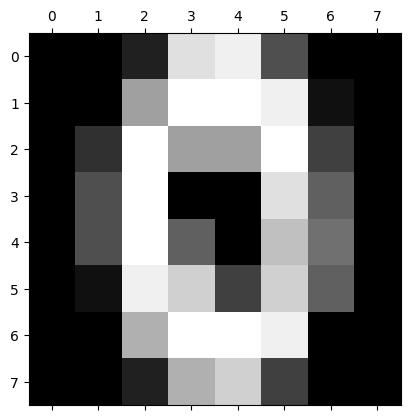

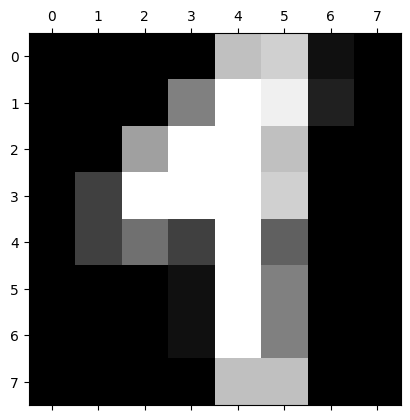

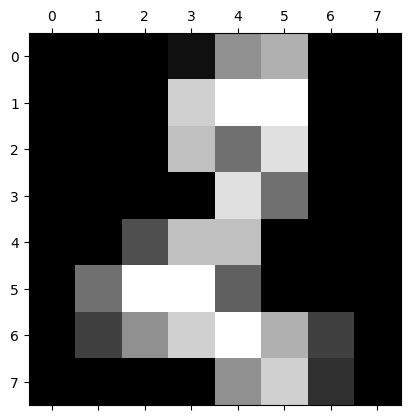

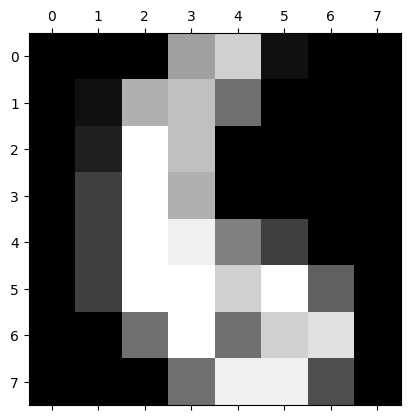

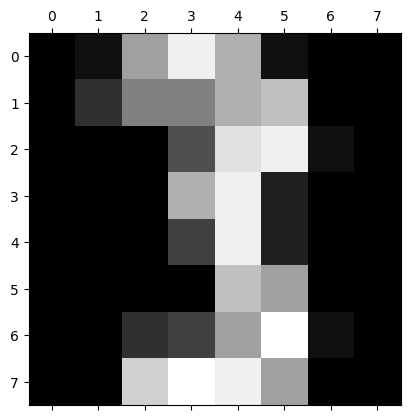

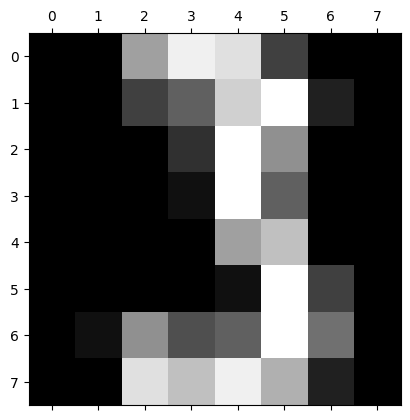

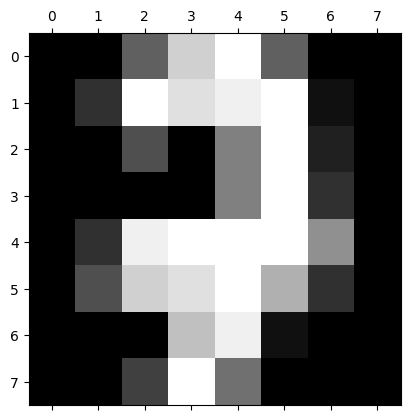

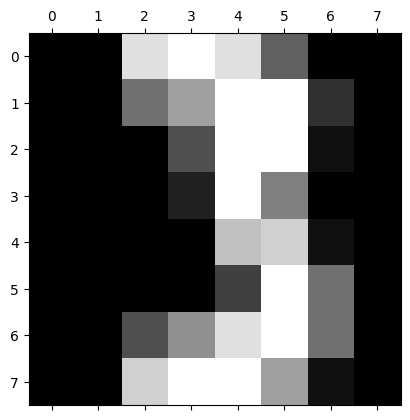

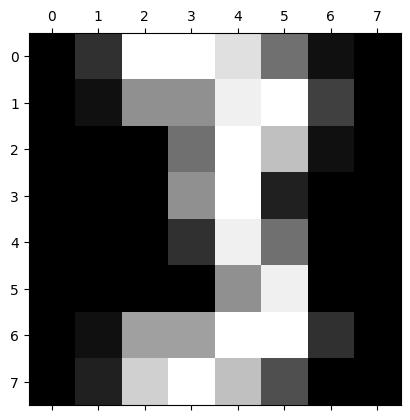

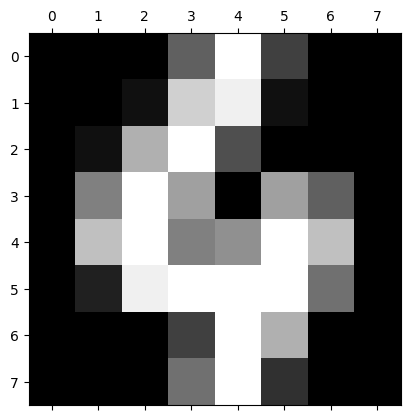

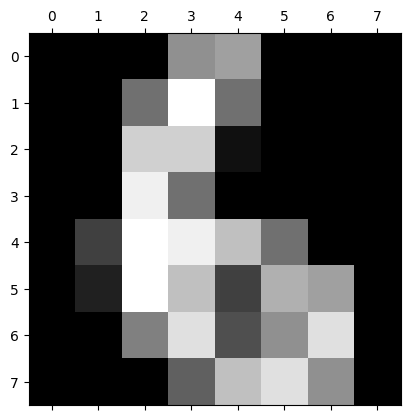

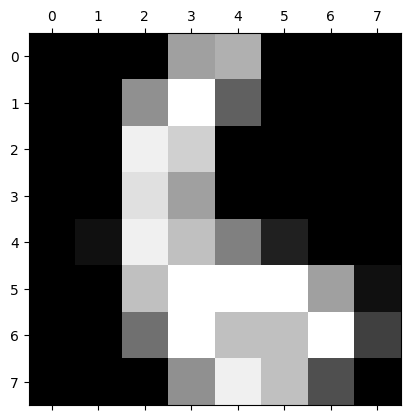

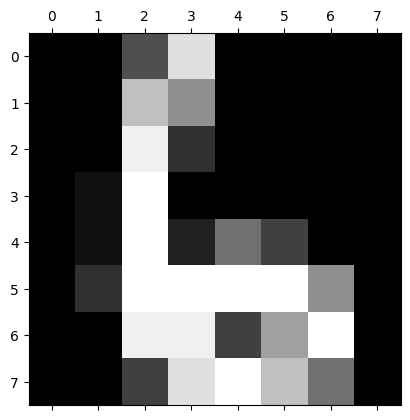

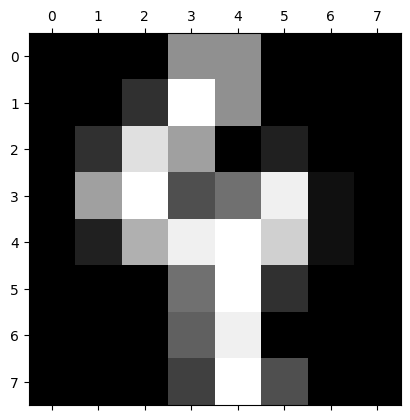

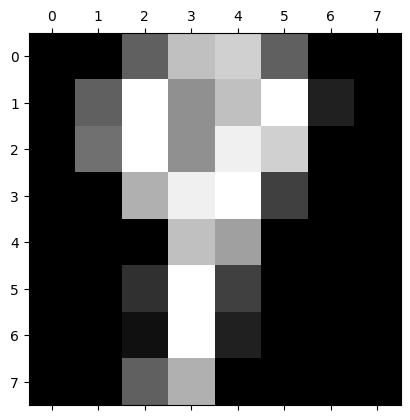

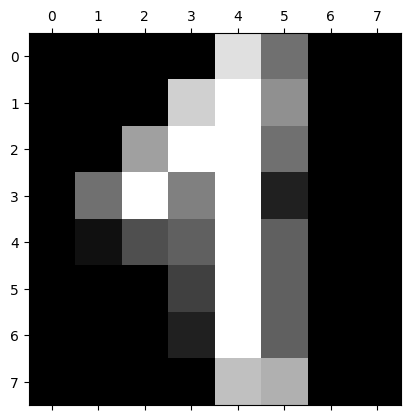

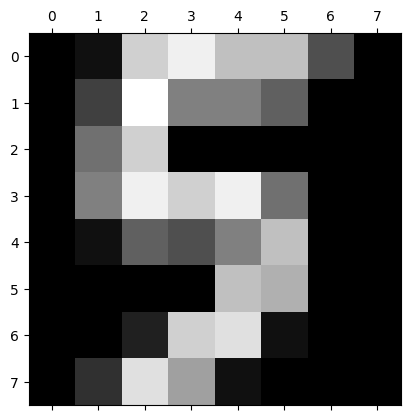

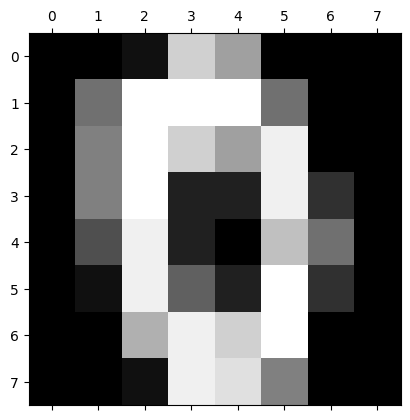

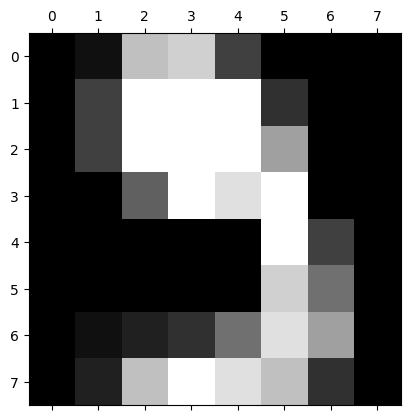

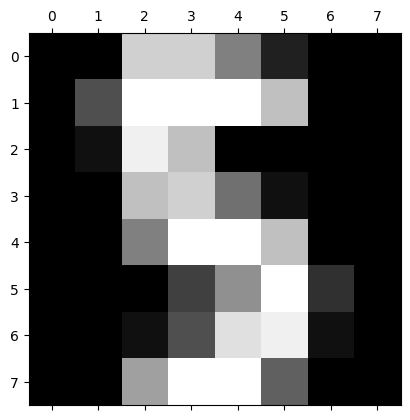

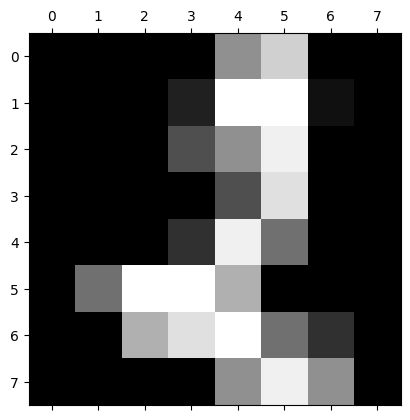

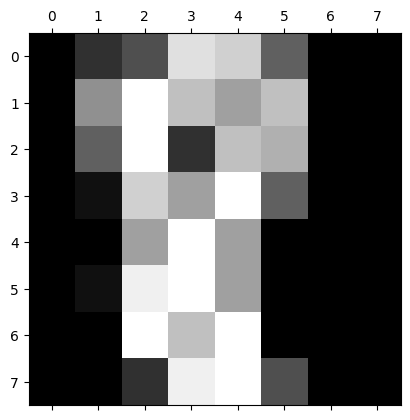

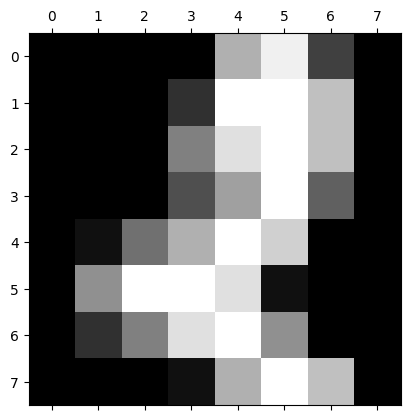

In [77]:
plt.gray()
for i in range(78):
    plt.matshow(digits.images[i])

In [78]:
digits.target[0:3] ## target is the actual value
# so we can use the target and data to train our model

array([0, 1, 2])

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [81]:
len(x_train)

1437

In [82]:
len(x_test)

360

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [84]:
model.fit(x_train,y_train)

C:\Users\sayem\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
model.score(x_test,y_test)

0.9722222222222222

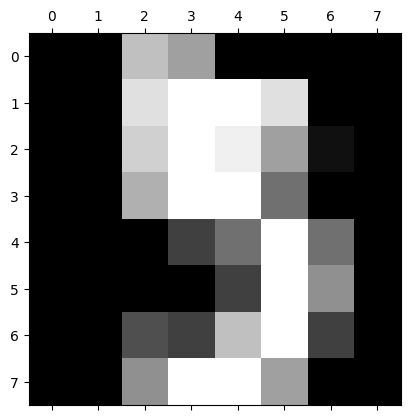

In [86]:
plt.matshow(digits.images[5])

In [87]:
digits.target[67]

6

In [104]:
model.predict([digits.data[77]])

array([2])

In [89]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

### Confusion matrix

In [90]:
y_predicted = model.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix  ## for seeing which cases fail to predict correct

In [92]:
cm = confusion_matrix(y_test,y_predicted)  ## compare with predicted values with the true values
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 32,  0,  1],
       [ 0,  0,  0,  1,  0,  2,  0,  0, 38,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 36]], dtype=int64)

In [93]:
model.score(x_test,y_test)

0.9722222222222222

Text(50.722222222222214, 0.5, 'Truth')

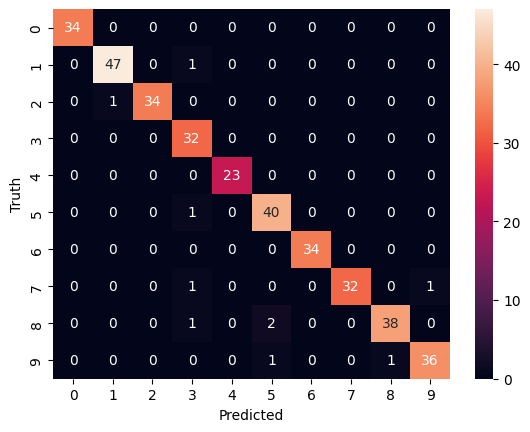

In [94]:
import seaborn as sn
plt.figure(figure = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [95]:
## It works in columns
# [0,0] = 38 means truth is 0 and my model predicted 0 38 times 
# [4,4] = 31 means truth is 4 and my model predicted 4 31 times but in [7,4]=1 means truth is 4 but my model predicted 7 -> 1 times